# OU-XML Scraper Tools - Demo

This notebook demos various tools for working with OU-XML documents scraped from OpenLearn, in particular, tools for scraping assets into a database to support discoverability.

## Search OpenLearn Units

We can search OpenLearn units by keyword. I forget what we actually search - titles, maybe? It's a bit ropey but we work with what we can get...

In [1]:
# List units by search keywords
! ouxml_units --term "history scottish"

 The history of medicine: A Scottish perspective https://www.open.edu/openlearn/history-the-arts/history/history-science-technology-and-medicine/history-medicine/the-history-medicine-scottish-perspective/content-section-0


In [4]:
# List units by search keywords
! ouxml_units --term world

 Digital skills: succeeding in a digital world https://www.open.edu/openlearn/education-development/digital-skills-succeeding-digital-world/content-section-overview
 Living in a globalised world https://www.open.edu/openlearn/society-politics-law/sociology/living-globalised-world/content-section-0
 Introducing the Classical world https://www.open.edu/openlearn/history-the-arts/classical-studies/introducing-the-classical-world/content-section-0
 The First World War: trauma and memory https://www.open.edu/openlearn/history-the-arts/the-first-world-war-trauma-and-memory/content-section-overview
 Icarus: entering the world of myth https://www.open.edu/openlearn/history-the-arts/icarus-entering-the-world-myth/content-section-0
 The world of the primary school https://www.open.edu/openlearn/education-development/the-world-the-primary-school/content-section-0
 Language in the real world https://www.open.edu/openlearn/languages/english-language/language-the-real-world/content-section-0
 Can re

## Grab an OU-XML File

We can grab an OU-XML file using the URL returned from the unit search:

In [5]:
! ouxml_grab https://www.open.edu/openlearn/science-maths-technology/chemistry/the-molecular-world/content-section-0

Creating database connection: openlearn_oer.db
Create tables...
getting ou-xml
Decoding utf-8...
...done decoding utf-8
parsing XML...
...done parsing XML
saving xml into db...
...done saving xml into db
XML
trying images
going into _xml_figures_openlearn
XML figures list len: 134


In [6]:
## Convert Document to Markdown in a specified directory
# Generate markdown from OU-XML
! ouxml2md --dbname openlearn_oer.db --outdir demo

Rendering files into dir: demo
Handling Part_00_01.md
Rewriting demo/Part_00_01.md
Handling Part_00_07.md
Rewriting demo/Part_00_07.md
Handling Part_00_05.md
Rewriting demo/Part_00_05.md
Handling Part_00_02.md
Rewriting demo/Part_00_02.md
Handling Part_00_04.md
Rewriting demo/Part_00_04.md
Handling Part_00_09.md
Rewriting demo/Part_00_09.md
Handling Part_00_08.md
Rewriting demo/Part_00_08.md
Handling Part_00_03.md
Rewriting demo/Part_00_03.md
Handling Part_00_06.md
Rewriting demo/Part_00_06.md
Generating table of contents file as: index.rst


Preview one of the generated markdown files as aa Jupyter notebook: [Part_00_01.md](./demo/session_00/Part_00_01.md)

## Query the Database

We can query the data by setting up a connection to the database:

In [14]:
import sqlite3
db_path = "openlearn_oer.db"

conn = sqlite3.connect(db_path)

One handy tool for working with data is the Pyhton *pandas* package. By convention, we import the *pandas* package using the alias `pd`:

In [11]:
import pandas as pd

Now we can query the database, first asking it what tables it includes:

In [15]:
q = "SELECT * FROM sqlite_master;""

pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,htmlxml,htmlxml,2,CREATE TABLE htmlxml (\n possible_sc_link T...
1,table,xmlfigures,xmlfigures,3,"CREATE TABLE xmlfigures (\n xpageurl TEXT,\..."
2,table,imagetest,imagetest,4,"CREATE TABLE imagetest (\n b64image BLOB,\n..."


Let's preview the contents of each of those tables.

First, the `htmlxml` table:

In [24]:
q = "SELECT * FROM htmlxml LIMIT 3;"

pd.read_sql_query(q, conn)

,possible_sc_link,doctype,html_url,xml,course_presentation,courseCode,courseTitle,itemTitle
0,https://www.open.edu/openlearn/science-maths-t...,XML,https://www.open.edu/openlearn/science-maths-t...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<?sc-t...",unknown,S205_2,,The molecular world


This table includes just the original OU-XML file. We can scrape multiple OpenLearn OU-XML files into the same database.

Secondly, the `xmlfigures` table:

In [25]:
q = "SELECT * FROM xmlfigures LIMIT 3;"

pd.read_sql_query(q, conn)

,xpageurl,caption,src,coursecode,desc,owner,item,itemack,srcurl,x_folderhash,x_contenthash,imgurl,alt,stub,minstub
0,https://www.open.edu/openlearn/science-maths-t...,Figure 1 The Rutherford model of the atom.,,,,,,,https://www.open.edu/openlearn/ocw/pluginfile....,ef4c3da7,aef30bac,https://www.open.edu/openlearn/ocw/pluginfile....,Figure 1,s205_2_001i.jpg,s205_2_001i
1,https://www.open.edu/openlearn/science-maths-t...,"Figure 2 The chemical elements may be solids, ...",,,,,,,https://www.open.edu/openlearn/ocw/pluginfile....,ef4c3da7,8d6164e0,https://www.open.edu/openlearn/ocw/pluginfile....,Figure 2,s205_2_002i.jpg,s205_2_002i
2,https://www.open.edu/openlearn/science-maths-t...,Figure 3 A ring of 48 iron atoms on a copper s...,,,,,,,https://www.open.edu/openlearn/ocw/pluginfile....,ef4c3da7,842e83b9,https://www.open.edu/openlearn/ocw/pluginfile....,Figure 3,s205_2_003i.jpg,s205_2_003i


This table parses out the figure references from the original OU-XML document and includes the figure caption and alt text.

And finally, the `imagetest` table:

In [17]:
q = "SELECT * FROM imagetest LIMIT 3;"

pd.read_sql_query(q, conn)

,b64image,stub,minstub
0,b'/9j/4RtLRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAMgA...,s205_2_001i.jpg,s205_2_001i
1,b'/9j/4Ro/RXhpZgAATU0AKgAAAAgADAEAAAMAAAABAlQA...,s205_2_002i.jpg,s205_2_002i
2,b'/9j/4Ri2RXhpZgAATU0AKgAAAAgADAEAAAMAAAABAaMA...,s205_2_003i.jpg,s205_2_003i


The `imagetest` table stores the actual image data. We can display the image as follows:

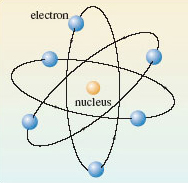

In [23]:
from base64 import b64decode
from IPython.display import Image

sample_img = pd.read_sql_query("SELECT b64image FROM imagetest LIMIT 1;", conn)
base64_data = sample_img["b64image"][0]

Image(b64decode(base64_data))

We can create a simple function to lookup an image by text contained in the caption:

In [32]:
def simple_image_lookup(q, conn):
    """Lookup an image via image caption."""
    q = f"SELECT caption, b64image FROM xmlfigures AS x JOIN imagetest AS i WHERE caption LIKE '%{q}%' AND x.minstub=i.minstub"
    df = pd.read_sql_query(q, conn)
    return df

For example, what images are there relating to "atoms"?

In [39]:
simple_image_lookup("atom", conn)

,caption,b64image
0,Figure 1 The Rutherford model of the atom.,b'/9j/4RtLRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAMgA...
1,"Figure 2 The chemical elements may be solids, ...",b'/9j/4Ro/RXhpZgAATU0AKgAAAAgADAEAAAMAAAABAlQA...
2,Figure 3 A ring of 48 iron atoms on a copper s...,b'/9j/4Ri2RXhpZgAATU0AKgAAAAgADAEAAAMAAAABAaMA...
3,"Figure 4 The distribution of protons, neutrons...",b'/9j/4Q9kRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAU8A...
4,Figure 5 A symbolism showing the number of neu...,b'/9j/4RSQRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAOwA...
5,Figure 6 (a) The distance between the atoms in...,b'/9j/4Q3lRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAWMA...
6,"Figure 7 The environment of a carbon atom, lab...",b'/9j/4QffRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAeoA...
7,Figure 8 The structure of the Al2Br6 molecule....,b'/9j/4Q70RXhpZgAATU0AKgAAAAgADAEAAAMAAAABAMoA...
8,Figure 12 The environment of each atom in (a) ...,b'/9j/4REJRXhpZgAATU0AKgAAAAgADAEAAAMAAAABAlcA...
9,Figure 15 The structures of: (a) zigzag chains...,b'/9j/4RCERXhpZgAATU0AKgAAAAgADAEAAAMAAAABAdAA...


We can hack a simople function to display these results graphically (there's probably a thing to do it direct from the dataframe but I donlt know of one offhand...):

'Figure 1 The Rutherford model of the atom.'

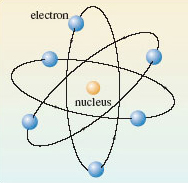

'Figure 2 The chemical elements may be solids, liquids or gases at room temperature: (a) aluminium (symbol Al, atomic number 13); (b) sodium (symbol Na, atomic number 11) is kept under oil to prevent reaction with air or water; (c) sulfur (symbol S, atomic number 16); (d) bromine (symbol Br, atomic number 35) is a dark-red liquid; (e) chlorine (symbol Cl, atomic number 17) is a yellow-green gas; (f) copper (symbol Cu, atomic number 29).'

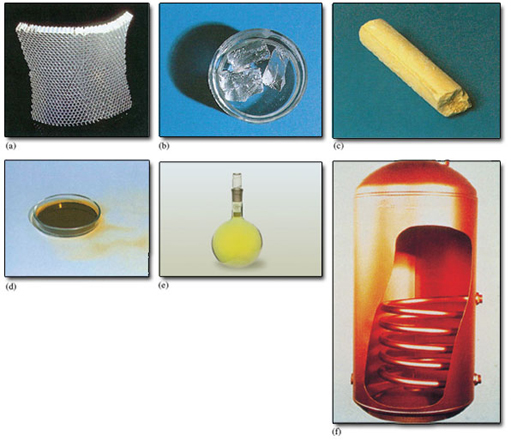

'Figure 3 A ring of 48 iron atoms on a copper surface observed by STM. Notice the wave-like crests and troughs inside the ring. These are thought to be due to the wave-like properties of electrons confined within the ring'

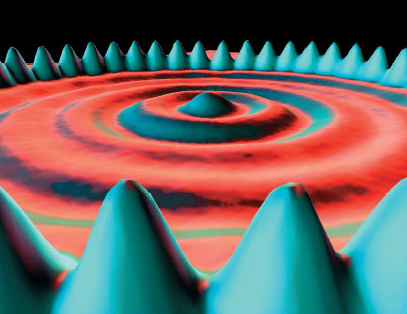

'Figure 4 The distribution of protons, neutrons and electrons in the atoms of the two isotopes of copper present in copper metal. In both cases, the atomic number is 29: there are 29 protons in the nucleus. This makes both types of atom, atoms of copper, but they differ in the number of neutrons contained in their nucleus'

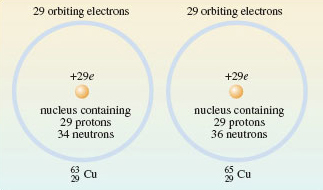

'Figure 5 A symbolism showing the number of neutrons, protons and electrons in the neutral atom of an isotope'

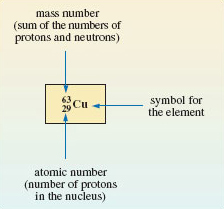

'Figure 6 (a) The distance between the atoms in Cl2 molecules is small compared with the average distance between the molecules in a jar of chlorine gas. On the scale set by our Cl2 molecule, that average distance puts the next Cl2 molecule on the opposite page. (b) In solid iodine, I2 molecules (e.g. AB) can be identified through their separation by a distance of 271 pm. These molecules are separated by longer distances of at least 350 pm (BC)'

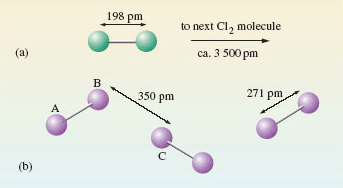

"Figure 7 The environment of a carbon atom, labelled A, in solid carbon dioxide, 'dry ice'. Note that molecule BAC is in the plane of the paper; the other four molecules shown are not"

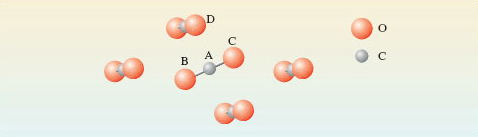

'Figure 8 The structure of the Al2Br6 molecule. The two aluminium atoms, and four of the bromine atoms at the ends of the molecule, lie in the same plane (at right-angles to the plane of the paper). The two bromines that bridge the aluminiums lie above and below this plane'

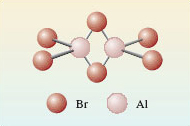

'Figure 12 The environment of each atom in (a) the diamond form of the element carbon; (b) the metallic element aluminium. Both substances are non-molecular, and have extended structures.'

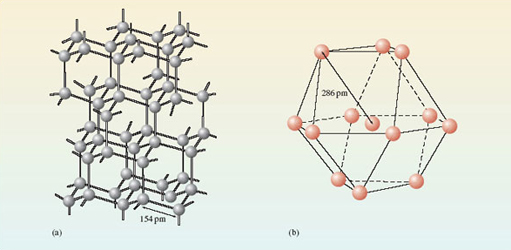

'Figure 15 The structures of: (a) zigzag chains in solid hydrogen fluoride; (b) solid silicon carbide, in which all distances between atoms linked by lines are 165 pm'

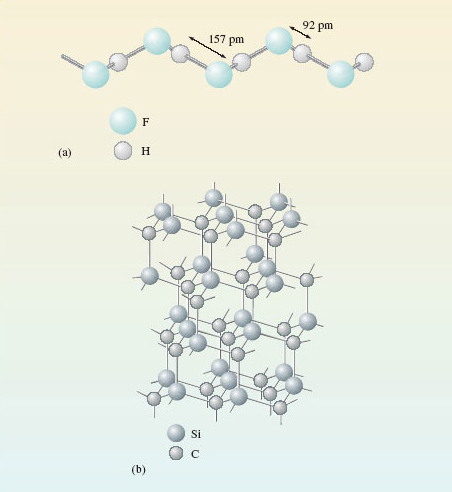

'Figure 21 A pathway showing the order in which the sub-shells should be filled when writing out the electronic configurations of atoms'

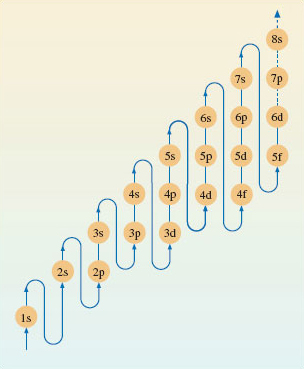

'Figure 27 A part Periodic Table showing shell structures for atoms of elements 2-20'

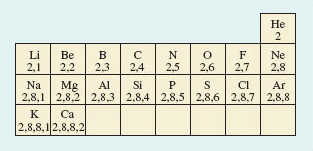

'Figure 28 Lewis structures for (a) gaseous Cl2 and (b) solid NaCl. Chlorine has seven outer electrons, but can acquire an additional electron to give eight, and the shell structure of argon, if an electron pair is shared between the two atoms in Cl2. Sodium has one outer electron, so sodium can acquire a neon shell, and chlorine an argon shell structure if this electron is transferred to a chlorine atom. This generates the Na + and Cl− ions in sodium chloride'

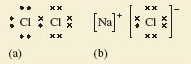

'Figure 30 Across a Period of the Periodic Table, the atomic number, or positive charge on the nucleus, increases. This increases the attraction of the outer electrons to the nucleus, so the electronegativity of the elements also increases. The principal quantum number of the outer electrons decreases from the bottom to the top of a Group. This means that they get closer to the positively charged nucleus. The result is, again, that the outer electrons are attracted more strongly, and the electronegativity usually increases. The three most electronegative elements are shown on a green background'

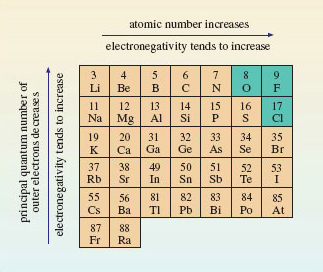

'Figure 33 (a) At normal pressures, solid carbon dioxide is molecular, and its vibrational spectrum shows no peaks in the frequency range 2 × 1013 - 4 × 1013 Hz. (b) After heating at a pressure of 400 kilobars, a peak appears at 2.37 × 1013 Hz. This is characteristic of the vibrations of two carbon atoms bound to, and equidistant from, an oxygen atom. It suggests that solid CO2 has assumed a silica-like form'

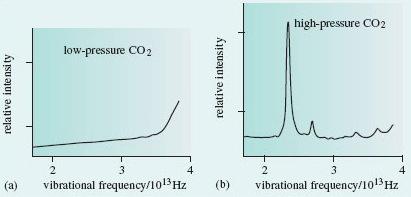

"Figure 39 Cotton is nearly pure cellulose, which is Nature's most common polymer. It is composed of glucose molecules linked through bridging oxygen atoms - a glycosidic linkage (highlighted in red). To the left of the reaction arrow two units are so joined. The six-membered rings are composed of five carbon atoms and one oxygen atom, but here the carbon atom labels have been omitted. Notice the terminal bonds through which the extended chains of the cotton fibre are formed. Replacement of the —OH groups by nitrate groups using a mixture of concentrated nitric and sulfuric acids gives nitrocellulose, a high explosive"

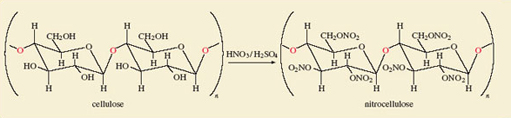

'Figure 50 The shapes of the H2O (left) and NH3 (right) molecules are consistent with the idea that the four pairs of electrons around the central atoms try to get as far apart as possible. The non-bonded pairs as well as the bonding pairs are involved in this repulsion'

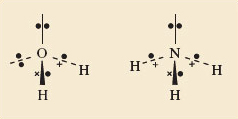

In [38]:
# Create a function to display each row of a dataframe
displayer = lambda row: display(f"{row['caption']}",Image(b64decode(row['b64image'])))

# And apply it to each row in the dataframe
simple_image_lookup("atom", conn).apply(displayer, axis=1);